In [29]:
# SampleLeft from ABB10
# There's still no condition for m_1
"""
*Input: 
A: rank n matrix in Z_q^{nxm} 
M: matrix in Z_q^{nxm_1}
T_A: "short" basis  for perp. q-ary lattice corresponding to A
u: a vector in Z_q^n
sigma: Gaussian parameter (note that sigma > ||Gram-schmitd(T_AP)||.omega(sqrt(log(m+m_1))) )

*Output:
Let F = (A|M_1). This alg. output a vector e in Z_q^{m+m_1} sampled from a distribution 
statistically close to lattice Gaussian distribution of F and u with parameter sigma.
"""
import random
import numpy as np

In [30]:
#GENERATE INPUTS:
def gaussian(s,c,x):
    """
    *Input: 
    s: Gaussian parameter
    c: Gaussian mean (a real number)
    x: Variable
    *Output: A real number
    exp((-pi*(x-c)^2)/s^2)   
    """
    return exp((-pi*(x-c)^2)/s^2)

#====================================================
#SampleZ Al. HERE
def sampleZalgorithm(n,s,c):
    """
    On input tuple (n,s,c), this Al. returns an integer number with Gaussian distribution
    *Input: 
    n: Security parameter
    s: Gaussian parameter
    c: Gaussian mean
    *Output:
    x: A random number with Gaussian distribution 
    """
    l =int(c -s*log(n,2))
    r = int(c+ s*log(n,2))
    i=0
    while i<1:
        x= random.randint(l,r)
        accept = random.uniform(0,1)
        if accept < gaussian(s,c,x): 
            i=i+1
            break
    return x
#====================================

def Random_Matrix(n,m):
    """
    *Input: 2 integer n,m 
    *Output: A random RANK n matrix B(nxm) with coefficients from 0 to q
    The output matrix has all row vectors independent
    """
    B=(matrix(ZZ,np.random.randint(q,size=(1,m)))) #first vector of B
    size_B=1
    while size_B < n:
        A = (matrix(ZZ,np.random.randint(q,size=(1,m))))
        h=B.rank()
        if ((B.stack(A))).rank()==h+1:
            B=B.stack(A) 
            size_B=size_B+1
    return(B)
#==========================================
#hermite normal form basis of a q-ary lattice.
def q_arybasis(A_1,q):
    """
    *Input: Arbitrary nxm matrix A_1 
    *Output: A HNF of perp. q-ary lattice corresponding to A_1
    All column vectors generate the whole lattice.
    """
    k=A_1.nrows()
    h =A_1.ncols()
    H=matrix(ZZ,((A_1).right_kernel()).basis())
    for i in range(k):
        H= matrix(ZZ,np.concatenate((H,matrix(q*matrix(np.identity(h,dtype=int))[h-n+i])), axis= 0))
    H=H.T
    return H
#====================================================


#NEEDED ALG. IN SAMPLELEFT

def SampleD(B,s,c):
    """
    * Input:
    B: A basis of any lattice lambda (as a Matrix whose column vectors form the whole lattice)
    s: Gaussian parameter
    c: Gaussian mean vector 
    * Output:
    A vector in lattice lambda with gaussian distribution
    """
    m= B.rank()
    n= next_prime(2^10)
    B=B.T
    v=zero_vector(ZZ,m)
    G=(B.gram_schmidt())[0]
    Bc = list(zero_vector(ZZ,m))+[c]
    Bv = list(zero_vector(ZZ,m))+[v]
    for i in range(m,0,-1):
        ci = Bc[i].dot_product(G[i-1])/(G[i-1].dot_product(G[i-1]))
        si= s/(G[i-1].norm())
        zi= sampleZalgorithm(2031,si,ci)
        Bc[i-1]=Bc[i]-zi*B[i-1]
        Bv[i-1] = Bv[i] +zi*B[i-1]    
    return(Bv[0])

#===================================================================================
def SampleLeft(A,M, T_A,u,sigma):  #This Alg. is in ABB10, section 4.1
    """*Input: 
    A : a RANK n matrix in Z_q^{n*m}
    M_1: a random matrix in Z_q^{n*m_1}
    T_A: "short"  basis of q-ary lattice corresponding to A
    u : a random vector in Z_q^n
    sigma: a Gaussian parameter
    
    *Outpt:
    Let F = (A|M_1). This alg. output a vector e in Z_q^{m+m_1} sampled from a distribution 
    statistically close to lattice Gaussian distribution of F with parameter sigma.
    """
    m= A.ncols()
    m_1=M.ncols()
    e_2= SampleD(identity_matrix(m_1), sigma, zero_vector(ZZ,m_1))
    y=vector(GF(q),u-M*e_2)
    t= vector(ZZ,A.solve_right(y))
    e_1=SampleD(T_A, sigma, -t) + t # Applying SamplePre from ABB10 page 6
    e= vector(ZZ,np.concatenate((e_1,e_2), axis = 0))
    return e
#================================================================================

# A TEST CASE
q= 79 #next_prime(2^10)
r=2
n=3
m=5
m_1= 3
A =Random_Matrix(n,m) #Matrix with coefficients in ZZ, from 0 to q
T_A=q_arybasis(B,q)
M = matrix(ZZ,random_matrix(GF(q), n,m_1)) # Matrix with coefficients in ZZ, from 0 to q
u = vector(ZZ,random_vector(GF(q), n))


In [31]:
#Normalise parameter sigma
def gram_schmidt_norm(S): #input matrix S whose columns are independent vectors
    m=S.rank()
    S_gram=((S.T).gram_schmidt()[0])
    S_gram_norm = int(max(((S_gram.rows())[i]).norm() for i in range(m)))+1
    return S_gram_norm
T_A_gram_norm = gram_schmidt_norm(T_A)


In [32]:
T_A_gram_norm 

239356

In [33]:
sigma = int(T_A_gram_norm*sqrt(log(m+m_1,2)))+1
print(sigma)

414577


In [34]:
x=SampleLeft(A,M, T_A,u,sigma)

In [37]:
vector(GF(q),(A.augment(M))*x)


(74, 40, 28)

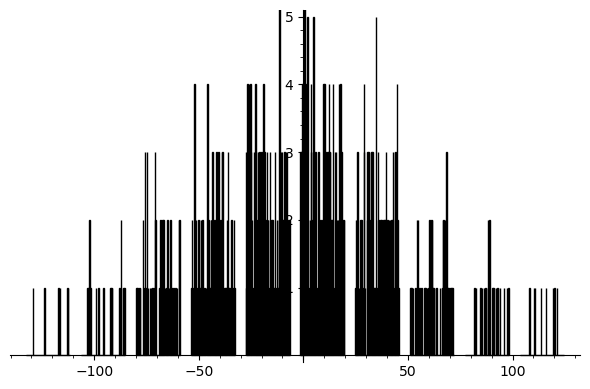

In [16]:
histogram([SampleLeft(A,M, T_A,u,sigma) for i in range(100)])